In [7]:
from astropy.io import ascii
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

In [8]:
data = ascii.read('Data/UID_0043587_RVC_008.tbl.txt')
data

HJD,Radial_Velocity,Radial_Velocity_Uncertainty
days,m / s,m / s
float64,float64,float64
2449676.0632,131.910003662,4.8400002
2449767.77441,22.6000003815,2.5699999
2449768.83203,-5.48999977112,2.6800001
2449793.79785,107.309997559,1.52
2450056.98828,116.669998169,1.6199999
2450087.88184,77.2600021362,2.1600001
2450088.91894,32.5999984741,1.64
2450089.00586,33.7299995422,1.5599999


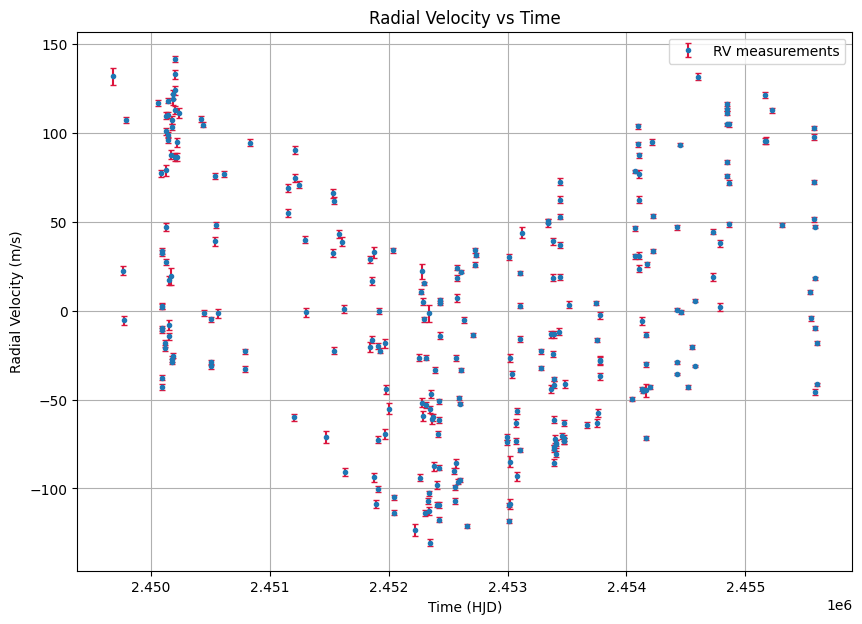

In [9]:
hjd = data['HJD']
radial_velocity = data['Radial_Velocity']
uncertainty = data['Radial_Velocity_Uncertainty']

plt.figure(figsize=(10, 7))
plt.errorbar(hjd, radial_velocity, yerr=uncertainty, fmt='o', ecolor='crimson', capsize=2, markersize=3, label='RV measurements')
plt.xlabel("Time (HJD)")
plt.ylabel("Radial Velocity (m/s)")
plt.title("Radial Velocity vs Time")
plt.grid(True)
plt.legend()

plt.savefig("rv_data_plot.pdf")

plt.show()